In [1]:
from google.colab import drive
import plotly.express as px
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
FILE_PATH="/content/SpotifyFeatures.csv"

In [4]:
spotifyData=pd.read_csv(FILE_PATH)
originalData=pd.read_csv(FILE_PATH)
print(originalData.shape)
originalData.head()

(232725, 18)


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [5]:
#Popularity would be predicted using other features.
PRED_COLUMN="popularity"

# Data Cleaning and Processing

##1. Checking if any attributes contain null values

In [6]:
spotifyData.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

##2. Standardize capitalization

In [7]:
#Making Genre texts capital 
print(spotifyData["genre"])
spotifyData["genre"]=spotifyData["genre"].apply(lambda x: x.upper())
print(spotifyData["genre"])

0         Movie
1         Movie
2         Movie
3         Movie
4         Movie
          ...  
232720     Soul
232721     Soul
232722     Soul
232723     Soul
232724     Soul
Name: genre, Length: 232725, dtype: object
0         MOVIE
1         MOVIE
2         MOVIE
3         MOVIE
4         MOVIE
          ...  
232720     SOUL
232721     SOUL
232722     SOUL
232723     SOUL
232724     SOUL
Name: genre, Length: 232725, dtype: object


##3. Have required columns

In [8]:
#Removing columns which doesn't add much value to the study
column_to_remove=["mode"]
req_column=[col for col in spotifyData.columns if not col in column_to_remove]
spotifyData=spotifyData[req_column]
spotifyData.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,MOVIE,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,0.0525,166.969,4/4,0.814
1,MOVIE,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,0.0868,174.003,4/4,0.816
2,MOVIE,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,0.0362,99.488,5/4,0.368
3,MOVIE,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,0.0395,171.758,4/4,0.227
4,MOVIE,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,0.0456,140.576,4/4,0.390


##4. Convert data types

In [9]:
#Make key and time_signature into category type from object type
print(spotifyData.dtypes)
categorical_columns=["key","time_signature"]
spotifyData[categorical_columns]=spotifyData[categorical_columns].astype("category")
print()
print()
print(spotifyData.dtypes)

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object


genre                 object
artist_name           object
track_name            object
track_id              object
popularity             int64
acousticness         float64
danceability         float64
duration_ms            int64
energy               float64
instrumentalness     float64
key                 category
liveness             float64
loudness             float64
speechiness          float64
tempo                float64
time_signature      category
valence              float64
dtype: object


##5. Text filtering

In [10]:
spotifyData["genre"].unique()

array(['MOVIE', 'R&B', 'A CAPELLA', 'ALTERNATIVE', 'COUNTRY', 'DANCE',
       'ELECTRONIC', 'ANIME', 'FOLK', 'BLUES', 'OPERA', 'HIP-HOP',
       "CHILDREN'S MUSIC", 'CHILDREN’S MUSIC', 'RAP', 'INDIE',
       'CLASSICAL', 'POP', 'REGGAE', 'REGGAETON', 'JAZZ', 'ROCK', 'SKA',
       'COMEDY', 'SOUL', 'SOUNDTRACK', 'WORLD'], dtype=object)

In [11]:
#The punctution above is causing duplicate values (Here CHILDREN'S MUSIC is considered as two categories because of puncuation)
def rem_punctuation(st):
  st=st.strip()
  st=re.sub(r'[^\w\s]', '',st)
  return st

spotifyData["genre"]=spotifyData["genre"].apply(lambda x: rem_punctuation(x))
spotifyData["genre"].unique()

array(['MOVIE', 'RB', 'A CAPELLA', 'ALTERNATIVE', 'COUNTRY', 'DANCE',
       'ELECTRONIC', 'ANIME', 'FOLK', 'BLUES', 'OPERA', 'HIPHOP',
       'CHILDRENS MUSIC', 'RAP', 'INDIE', 'CLASSICAL', 'POP', 'REGGAE',
       'REGGAETON', 'JAZZ', 'ROCK', 'SKA', 'COMEDY', 'SOUL', 'SOUNDTRACK',
       'WORLD'], dtype=object)

##6. Make new column

In [12]:
#Single track has multiple genre so we combine it into a list
df_grouped=(spotifyData.groupby("track_id")["genre"].apply(list)).to_frame().reset_index()
spotifyData=pd.merge(spotifyData,df_grouped, left_on='track_id', right_on='track_id', how='left')
spotifyData.head()

,genre_x,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,genre_y
0,MOVIE,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,0.0525,166.969,4/4,0.814,[MOVIE]
1,MOVIE,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,0.0868,174.003,4/4,0.816,[MOVIE]
2,MOVIE,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,0.0362,99.488,5/4,0.368,[MOVIE]
3,MOVIE,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,0.0395,171.758,4/4,0.227,[MOVIE]
4,MOVIE,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,0.0456,140.576,4/4,0.390,[MOVIE]


##7. Remove duplicate rows

In [13]:
spotifyData.drop_duplicates(subset="track_id",keep=False, inplace=True)

##8. Remove invalid columns

In [14]:
spotifyData["genre_list"]=spotifyData["genre_y"]
spotifyData.drop(["genre_x","genre_y"],axis=1,inplace=True)

##9. Renaming attribute "duration_ms" to "duration_in_milliseconds"

In [15]:
spotifyData.rename(columns = {"duration_ms" : "duration_in_milliseconds"}, inplace = True)

##10. Check for outliers

In [16]:
spotifyData.describe()

,popularity,acousticness,danceability,duration_in_milliseconds,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,141650.000000,141650.000000,141650.000000,1.416500e+05,141650.000000,141650.000000,141650.000000,141650.000000,141650.000000,141650.000000,141650.000000
mean,31.980854,0.436685,0.528496,2.371573e+05,0.544834,0.193319,0.234449,-10.656996,0.134734,116.693988,0.449168
std,15.850546,0.373820,0.193533,1.406640e+05,0.286310,0.338497,0.222889,6.700037,0.221962,31.677253,0.274753
min,0.000000,0.000000,0.056900,1.538700e+04,0.000098,0.000000,0.010200,-52.457000,0.022200,30.379000,0.000000
25%,22.000000,0.054400,0.396000,1.732302e+05,0.307000,0.000000,0.097700,-13.821000,0.037000,91.089250,0.207000
50%,33.000000,0.355000,0.546000,2.186685e+05,0.578000,0.000116,0.132000,-8.669000,0.049000,114.073500,0.437000
75%,43.000000,0.831000,0.674000,2.716898e+05,0.792000,0.196000,0.292000,-5.775000,0.099000,138.120500,0.674000
max,97.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


##11. Trim the data

In [17]:
lower=0.1
upper=0.9
#Trim Top 10 and bottom 10 percentile data
trim_columns=["valence","liveness","loudness","instrumentalness","tempo"]
quant_df = spotifyData[trim_columns].quantile([lower, upper])
spotifyData[trim_columns] = spotifyData[trim_columns].apply(lambda x: x[(x >= quant_df.loc[lower,x.name]) & (x <= quant_df.loc[upper,x.name])], axis=0)
spotifyData=spotifyData.dropna()
spotifyData=spotifyData.reset_index(drop=True)
spotifyData.describe()

,popularity,acousticness,danceability,duration_in_milliseconds,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,57422.000000,57422.000000,57422.000000,5.742200e+04,57422.000000,57422.000000,57422.000000,57422.00000,57422.000000,57422.000000,57422.000000
mean,34.786772,0.372163,0.577919,2.371130e+05,0.558835,0.101310,0.187387,-9.11863,0.095096,115.770611,0.452796
std,16.038214,0.342739,0.162686,1.238481e+05,0.233037,0.235026,0.118189,3.84302,0.143020,22.453504,0.213922
min,0.000000,0.000001,0.079100,1.550900e+04,0.004540,0.000000,0.075200,-20.39500,0.022200,78.513000,0.074200
25%,26.000000,0.046200,0.466000,1.825205e+05,0.381000,0.000000,0.105000,-11.37000,0.034000,96.002000,0.272000
50%,37.000000,0.261000,0.587000,2.216820e+05,0.574000,0.000039,0.134000,-8.09100,0.045400,115.248000,0.450000
75%,46.000000,0.701000,0.698000,2.686795e+05,0.744000,0.014275,0.243000,-6.06000,0.082600,133.912000,0.633000
max,97.000000,0.996000,0.986000,4.791725e+06,0.998000,0.873000,0.626000,-4.16600,0.967000,164.028000,0.841000


##12. Clip the Data

In [18]:
lower=0.01
upper=0.99
#Clip Top 1 and Bottom 1 percentile data to the nearest value.
clip_columns=["valence","liveness","loudness","instrumentalness","tempo"]
lower = spotifyData[clip_columns].quantile(lower)
upper = spotifyData[clip_columns].quantile(upper)
spotifyData[clip_columns] = spotifyData[clip_columns].clip(lower=lower, upper=upper, axis=1)
spotifyData=spotifyData.dropna()
spotifyData=spotifyData.reset_index(drop=True)
spotifyData.describe()

,popularity,acousticness,danceability,duration_in_milliseconds,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,57422.000000,57422.000000,57422.000000,5.742200e+04,57422.000000,57422.000000,57422.000000,57422.000000,57422.000000,57422.000000,57422.000000
mean,34.786772,0.372163,0.577919,2.371130e+05,0.558835,0.101239,0.187207,-9.115243,0.095096,115.758099,0.452799
std,16.038214,0.342739,0.162686,1.238481e+05,0.233037,0.234795,0.117519,3.831465,0.143020,22.412582,0.213765
min,0.000000,0.000001,0.079100,1.550900e+04,0.004540,0.000000,0.076900,-19.579790,0.022200,79.385210,0.082500
25%,26.000000,0.046200,0.466000,1.825205e+05,0.381000,0.000000,0.105000,-11.370000,0.034000,96.002000,0.272000
50%,37.000000,0.261000,0.587000,2.216820e+05,0.574000,0.000039,0.134000,-8.091000,0.045400,115.248000,0.450000
75%,46.000000,0.701000,0.698000,2.686795e+05,0.744000,0.014275,0.243000,-6.060000,0.082600,133.912000,0.633000
max,97.000000,0.996000,0.986000,4.791725e+06,0.998000,0.860000,0.588000,-4.266210,0.967000,161.112790,0.832000


##13. Rearranging columns for better readability

In [19]:
orderList = [2,1,0,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
spotifyData = spotifyData[[spotifyData.columns[i] for i in orderList]]
spotifyData.head()

,track_id,track_name,artist_name,popularity,acousticness,danceability,duration_in_milliseconds,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,genre_list
0,0CoSDzoNIKCRs124s9uTVy,Don't Let Me Be Lonely Tonight,Joseph Williams,3,0.95200,0.663,170267,0.1310,0.00000,C,0.1030,-13.879,0.0362,99.488,5/4,0.368,[MOVIE]
1,0Mf1jKa8eNAf1a4PwTbizj,Le petit souper aux chandelles,Henri Salvador,0,0.74900,0.578,160627,0.0948,0.00000,C#,0.1070,-14.970,0.1430,87.479,4/4,0.358,[MOVIE]
2,0NUiKYRd6jt1LKMYGkUdnZ,"Premières recherches (par Paul Ventimila, Lori...",Martin & les fées,2,0.34400,0.703,212293,0.2700,0.00000,C#,0.1050,-12.675,0.9530,82.873,4/4,0.533,[MOVIE]
3,0PbIF9YVD505GutwotpB5C,Let Me Let Go,Laura Mayne,15,0.93900,0.416,240067,0.2690,0.00000,F#,0.1130,-8.949,0.0286,96.827,4/4,0.274,[MOVIE]
4,0ST6uPfvaPpJLtQwhE6KfC,Helka,Chorus,0,0.00104,0.734,226200,0.4810,0.00086,C,0.0769,-7.725,0.0460,125.080,4/4,0.765,[MOVIE]


In [20]:
spotifyData.shape

(57422, 17)

# EDA (Exploratory Data Analysis)

##1. Histogram of each columns

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'duration_in_milliseconds'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'valence'}>, <Axes: >]], dtype=object)

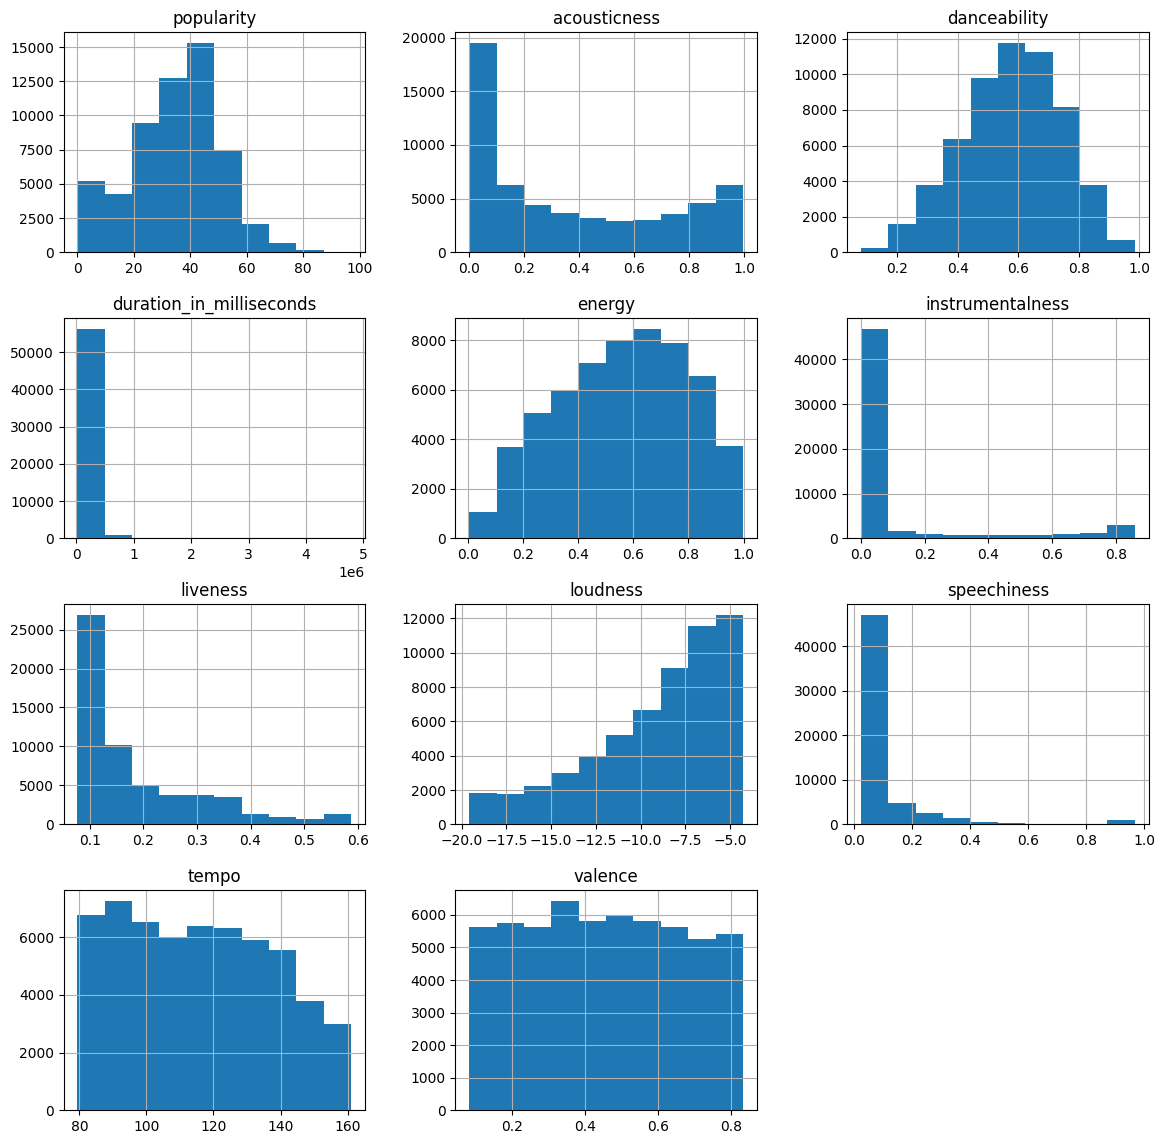

In [21]:
spotifyData.hist(figsize=(14,14))

##2. Histogram for Genre using original data

array([[<Axes: title={'center': 'A Capella'}>,
        <Axes: title={'center': 'Alternative'}>,
        <Axes: title={'center': 'Anime'}>,
        <Axes: title={'center': 'Blues'}>,
        <Axes: title={'center': "Children's Music"}>],
       [<Axes: title={'center': 'Children’s Music'}>,
        <Axes: title={'center': 'Classical'}>,
        <Axes: title={'center': 'Comedy'}>,
        <Axes: title={'center': 'Country'}>,
        <Axes: title={'center': 'Dance'}>],
       [<Axes: title={'center': 'Electronic'}>,
        <Axes: title={'center': 'Folk'}>,
        <Axes: title={'center': 'Hip-Hop'}>,
        <Axes: title={'center': 'Indie'}>,
        <Axes: title={'center': 'Jazz'}>],
       [<Axes: title={'center': 'Movie'}>,
        <Axes: title={'center': 'Opera'}>,
        <Axes: title={'center': 'Pop'}>, <Axes: title={'center': 'R&B'}>,
        <Axes: title={'center': 'Rap'}>],
       [<Axes: title={'center': 'Reggae'}>,
        <Axes: title={'center': 'Reggaeton'}>,
        <Axes: 

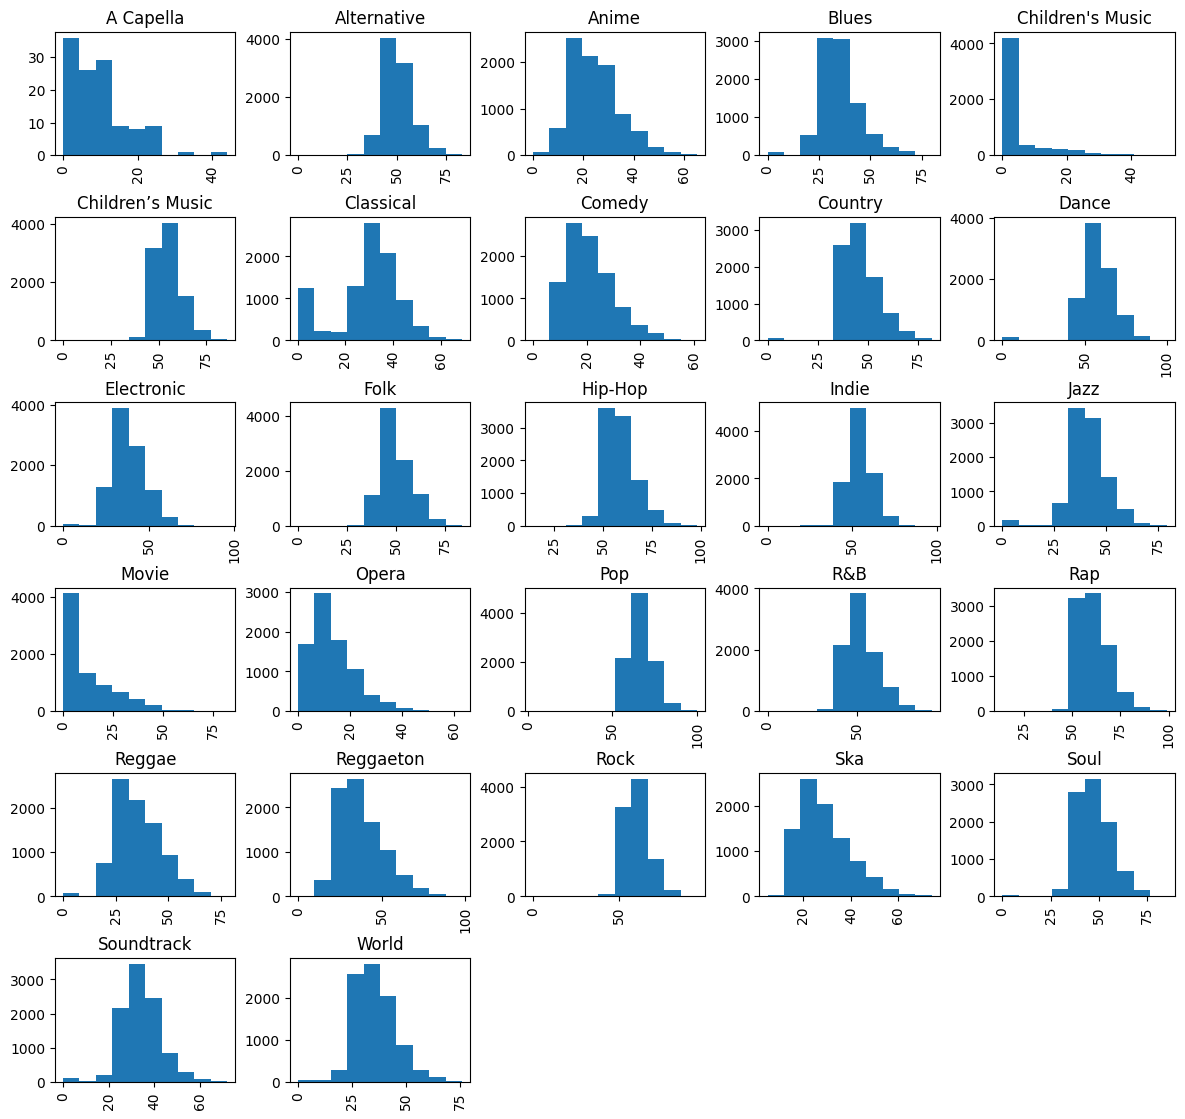

In [22]:
originalData.hist(column="popularity",by="genre",figsize=(14,14))

##3. Histogram for Category columns

array([[<Axes: title={'center': 'A'}>, <Axes: title={'center': 'A#'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'C'}>, <Axes: title={'center': 'C#'}>,
        <Axes: title={'center': 'D'}>],
       [<Axes: title={'center': 'D#'}>, <Axes: title={'center': 'E'}>,
        <Axes: title={'center': 'F'}>],
       [<Axes: title={'center': 'F#'}>, <Axes: title={'center': 'G'}>,
        <Axes: title={'center': 'G#'}>]], dtype=object)

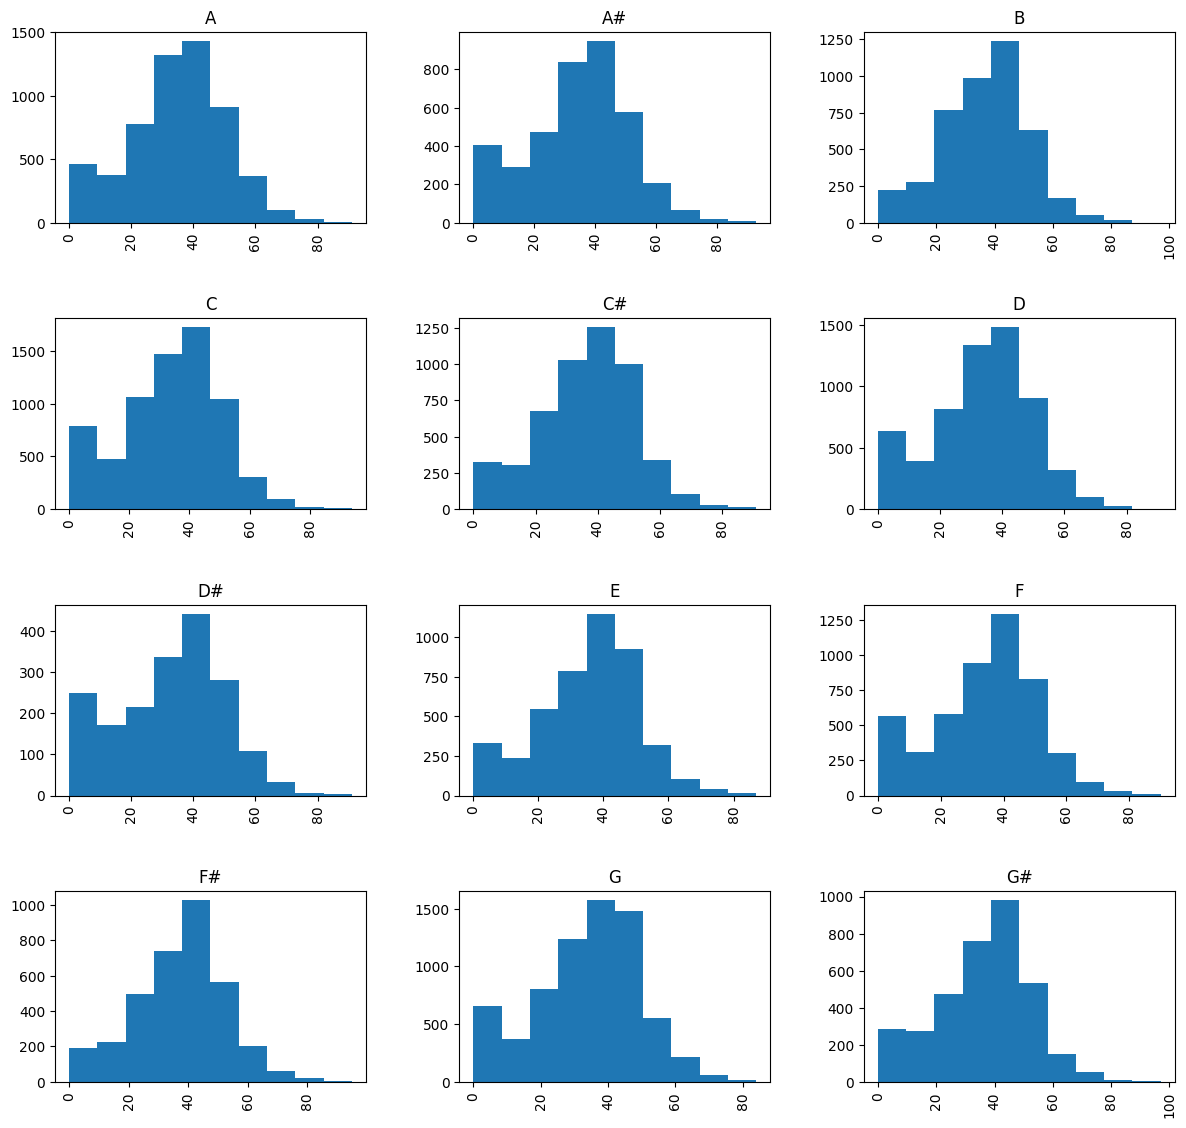

In [23]:
spotifyData.hist(column="popularity",by="key",figsize=(14,14))

array([[<Axes: title={'center': '0/4'}>, <Axes: title={'center': '1/4'}>],
       [<Axes: title={'center': '3/4'}>, <Axes: title={'center': '4/4'}>],
       [<Axes: title={'center': '5/4'}>, <Axes: >]], dtype=object)

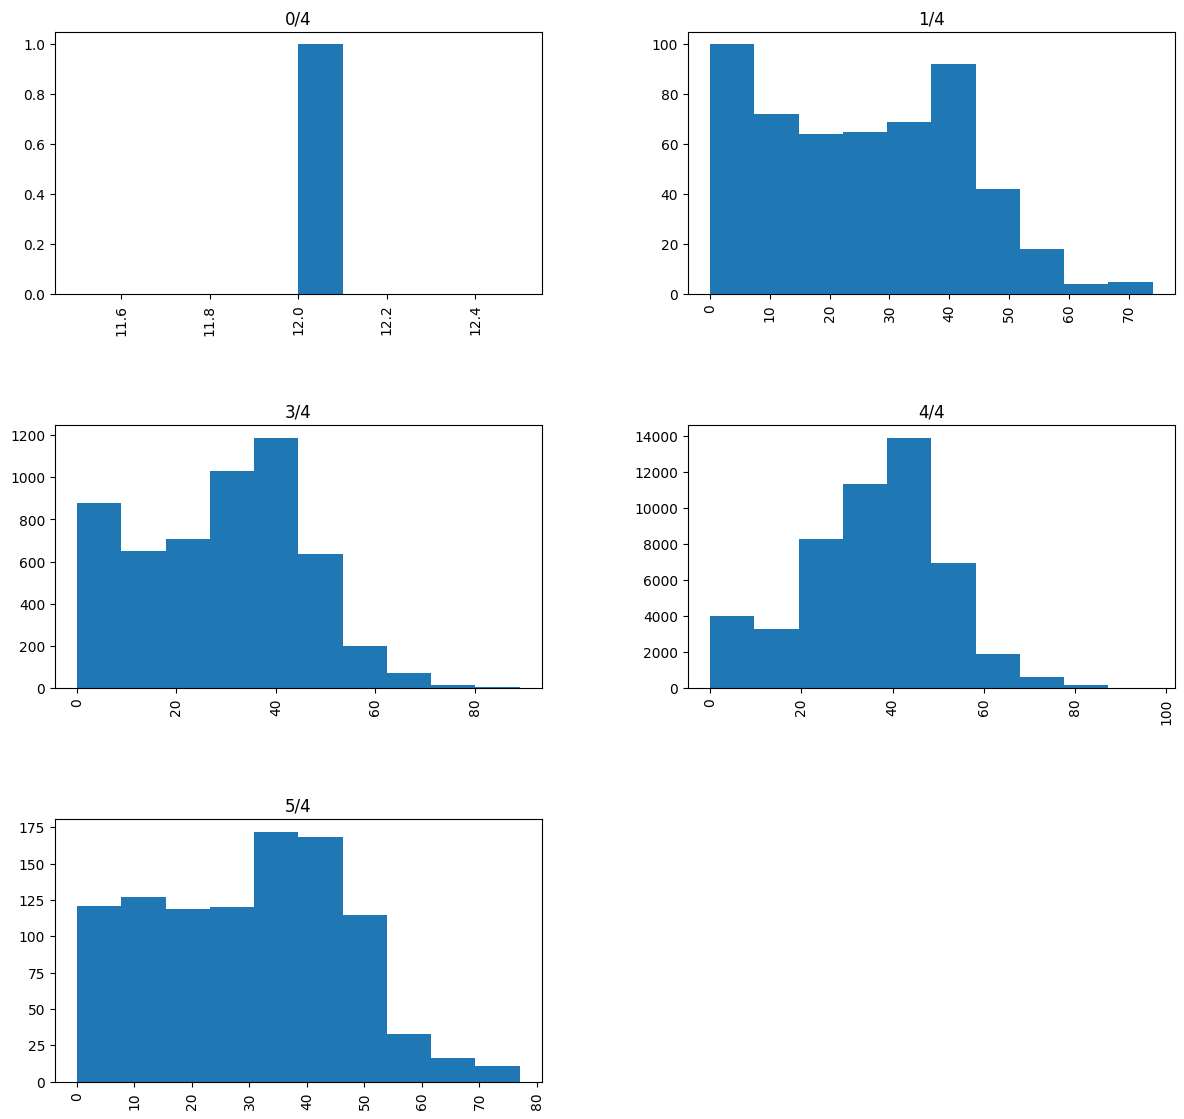

In [24]:
spotifyData.hist(column="popularity",by="time_signature",figsize=(14,14))

##4.Cross Correlation Matrix

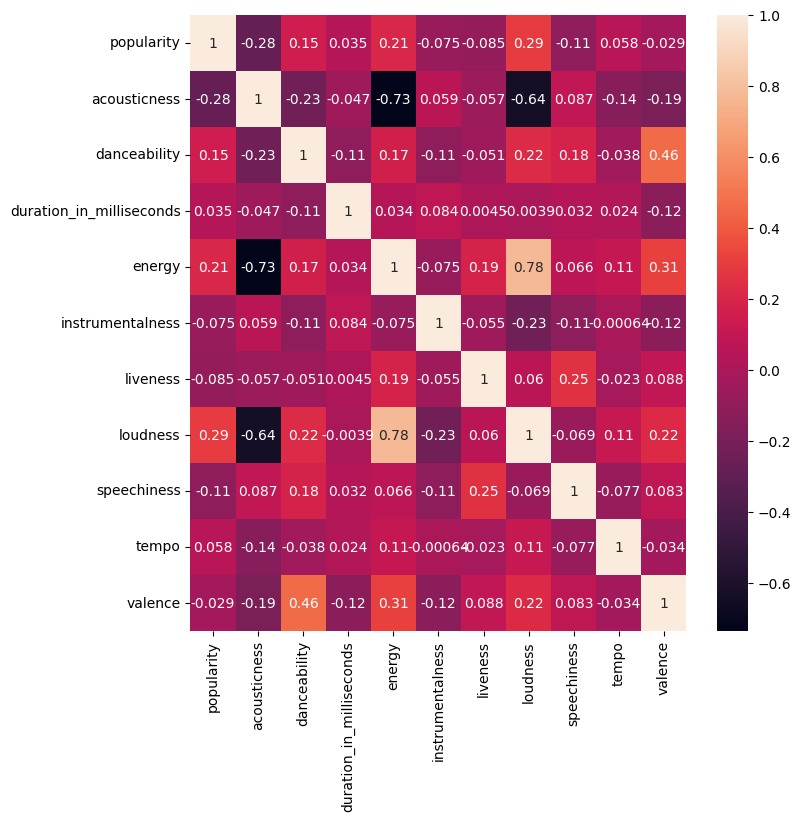

In [25]:
corr_matrix = spotifyData.corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

##5. Analysis of artist with most songs

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'duration_in_milliseconds'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'valence'}>, <Axes: >]], dtype=object)

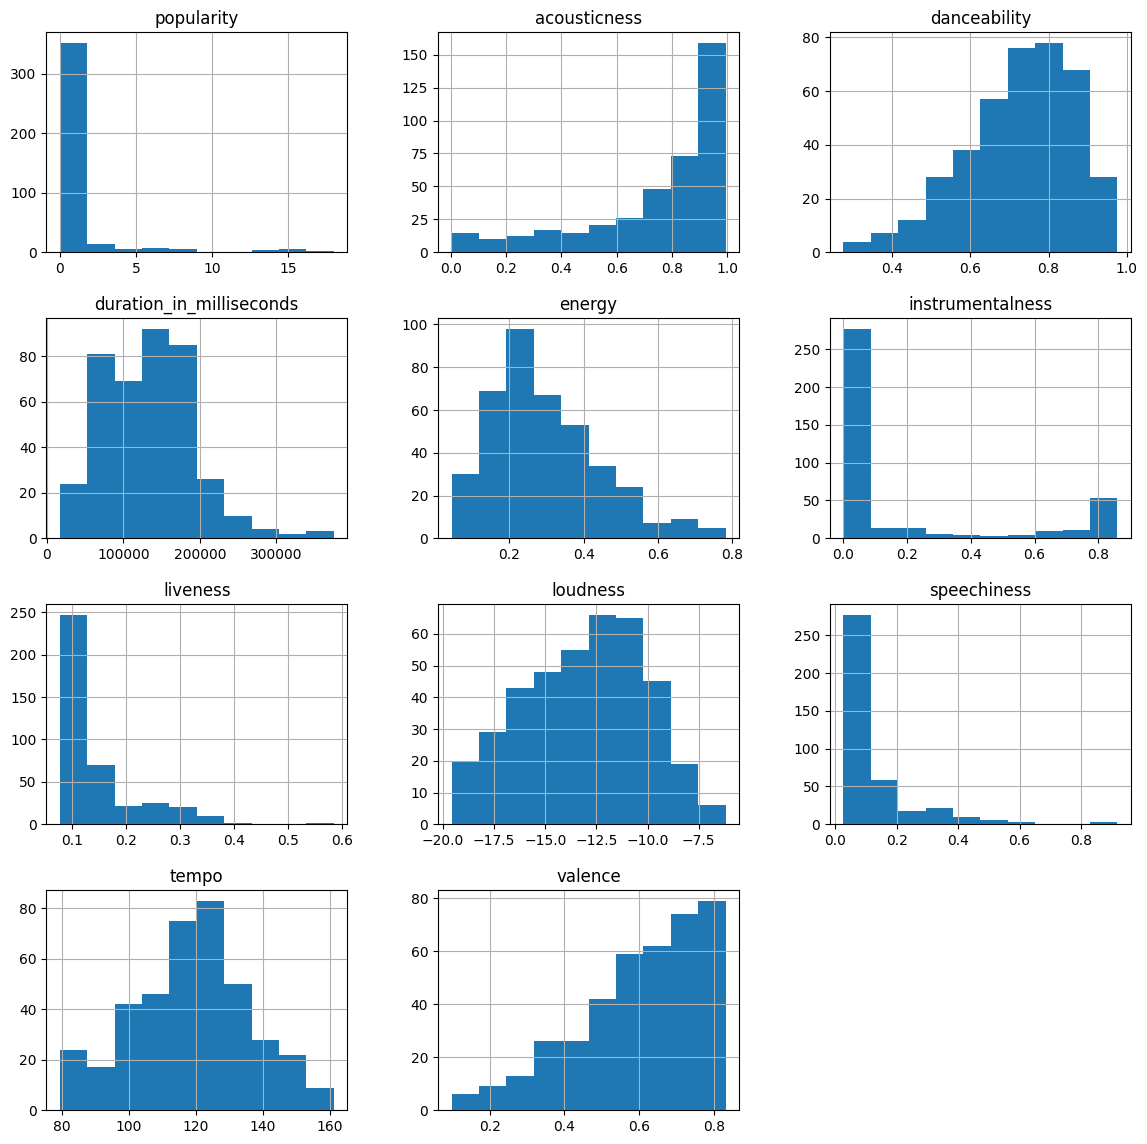

In [26]:
Max_artist=spotifyData["artist_name"].value_counts().idxmax()
spotifyData[spotifyData["artist_name"]==Max_artist].hist(figsize=(14,14))

##6. Analysis of Artist who's mean popularity is highest

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'duration_in_milliseconds'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'valence'}>, <Axes: >]], dtype=object)

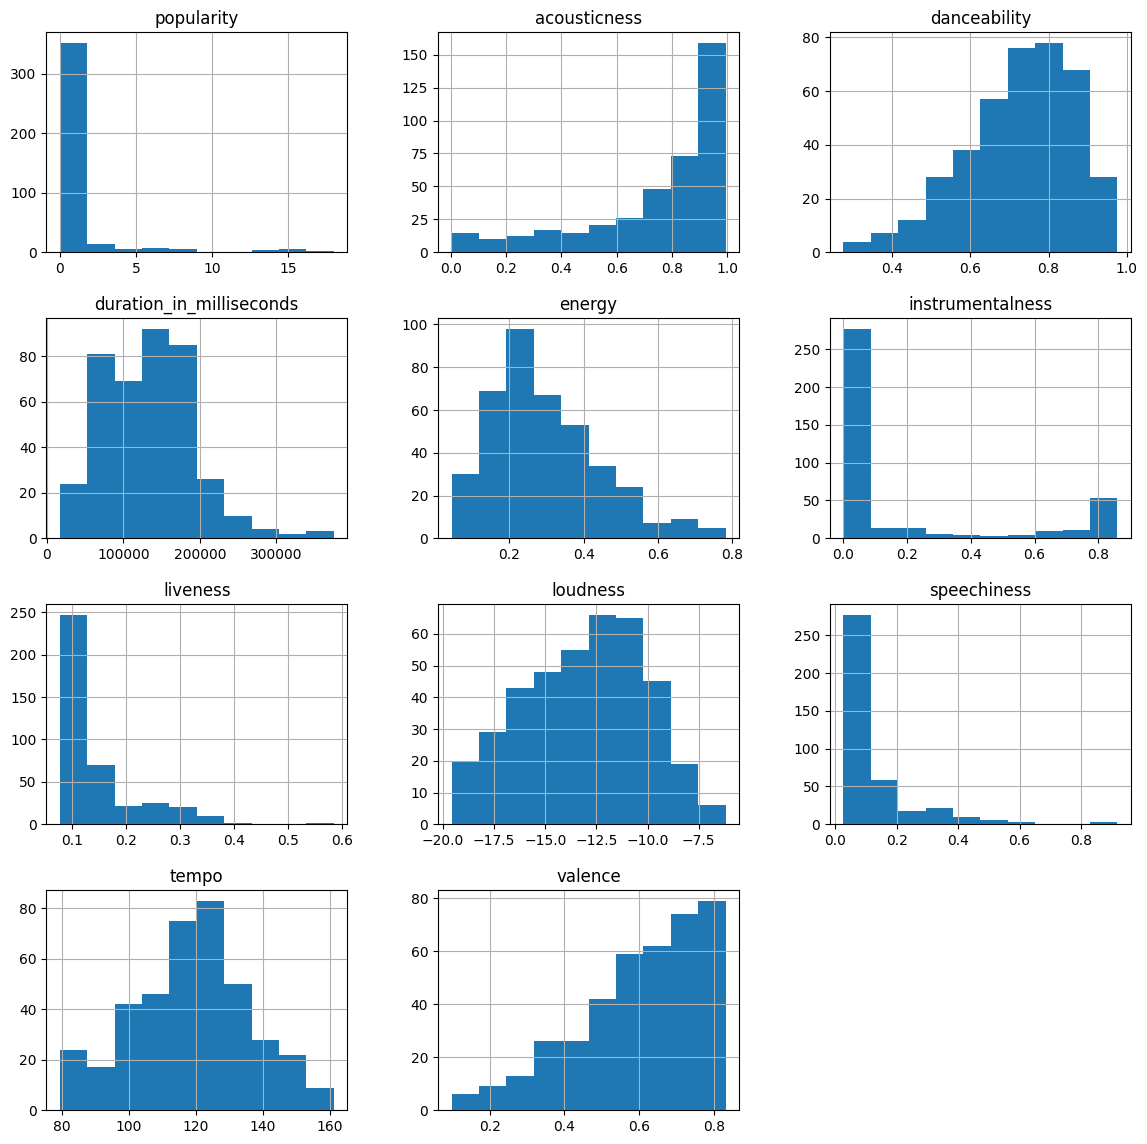

In [27]:
popular_artist=spotifyData.groupby('artist_name')['popularity'].mean().idxmax()
spotifyData[spotifyData["artist_name"]==Max_artist].hist(figsize=(14,14))

##7. Analysis of most popular tracks

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'duration_in_milliseconds'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'valence'}>, <Axes: >]], dtype=object)

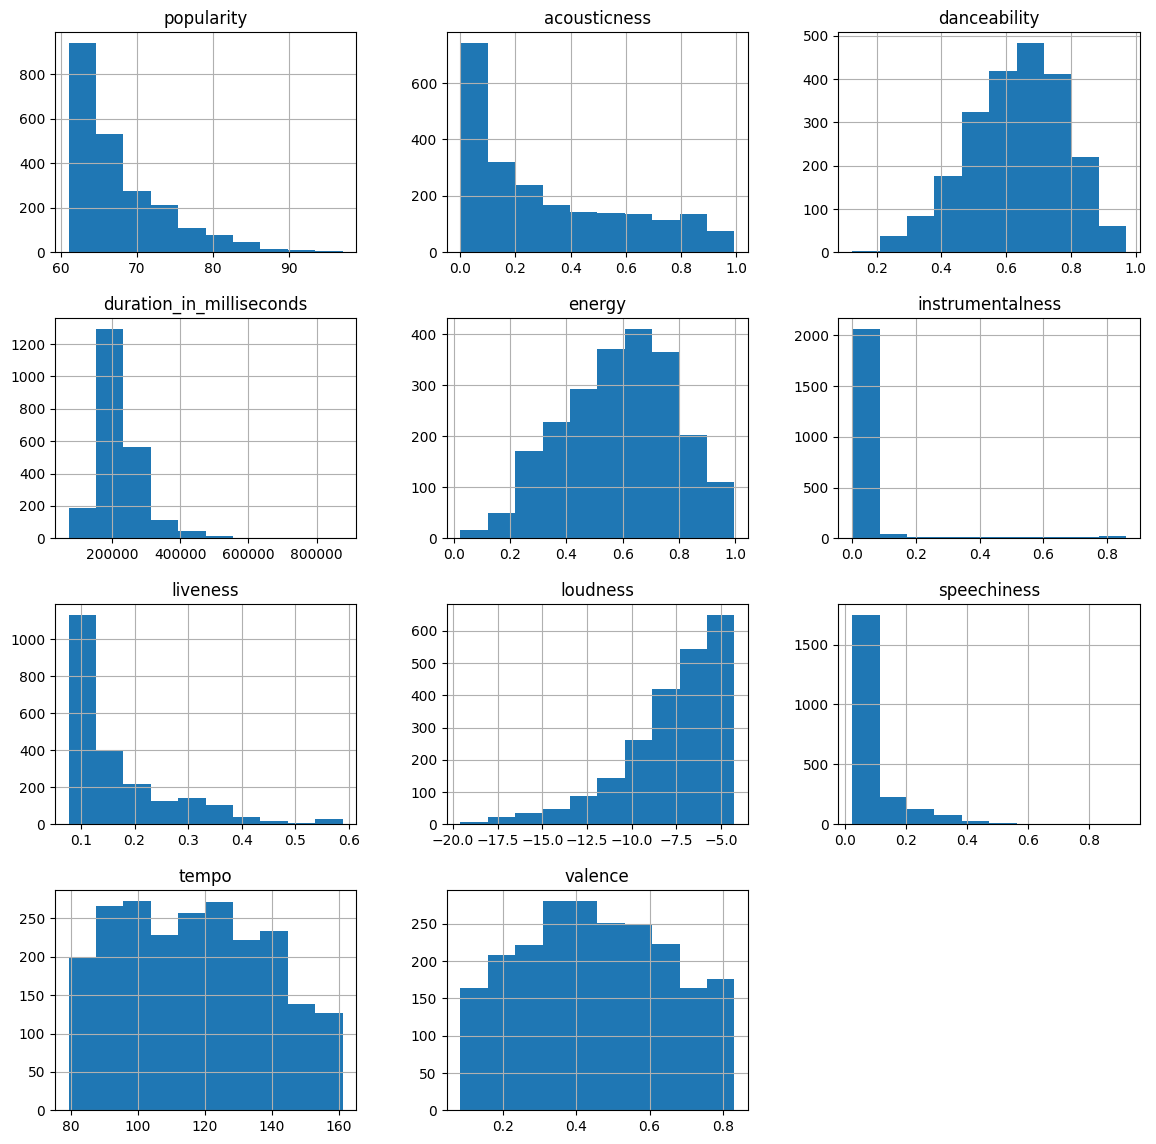

In [28]:
spotifyData[spotifyData["popularity"]>60].hist(figsize=(14,14))

##8. Scatter plot of few features with respect to popularity

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='loudness', ylabel='popularity'>

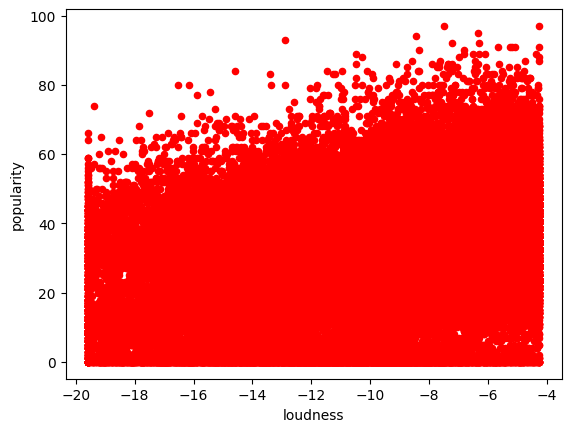

In [29]:
#Loudness vs popularity
spotifyData.plot.scatter(x="loudness",y="popularity", color = "r")

<Axes: xlabel='liveness', ylabel='popularity'>

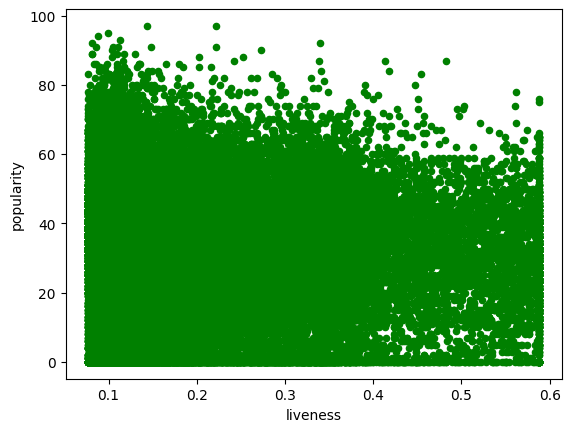

In [30]:
#liveness vs popularity
spotifyData.plot.scatter(x="liveness",y="popularity", color = "g")

<Axes: xlabel='danceability', ylabel='popularity'>

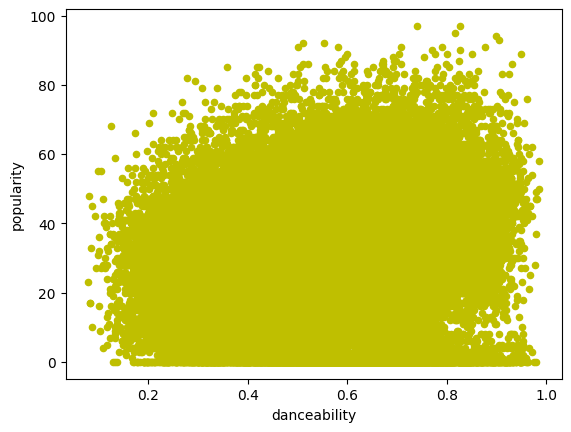

In [31]:
#danceability vs popularity
spotifyData.plot.scatter(x="danceability",y="popularity", color = "y")

##9. Bar Graph of 5 most Popular Songs vs Duration in milliseconds 

[Text(0.5, 1.0, '5 most duration songs')]

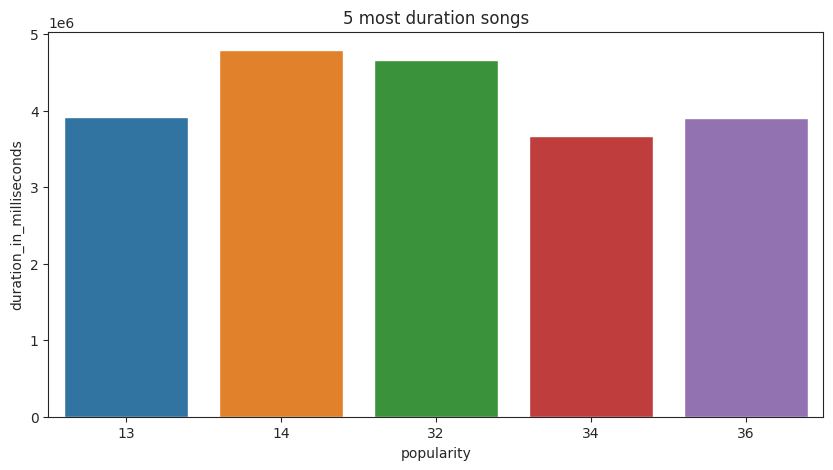

In [32]:
sns.set_style(style = 'ticks')
plt.figure(figsize = (10,5))
top = spotifyData.sort_values('duration_in_milliseconds', ascending = False).head(5)
sns.barplot(y = 'duration_in_milliseconds', x = 'popularity', data = top).set(title = '5 most duration songs')

##10. Different types of genres and their percentages

In [33]:
fig = px.pie(originalData['genre'].value_counts().reset_index(), values='genre', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

##11. Popularity vs Energy boxplot.



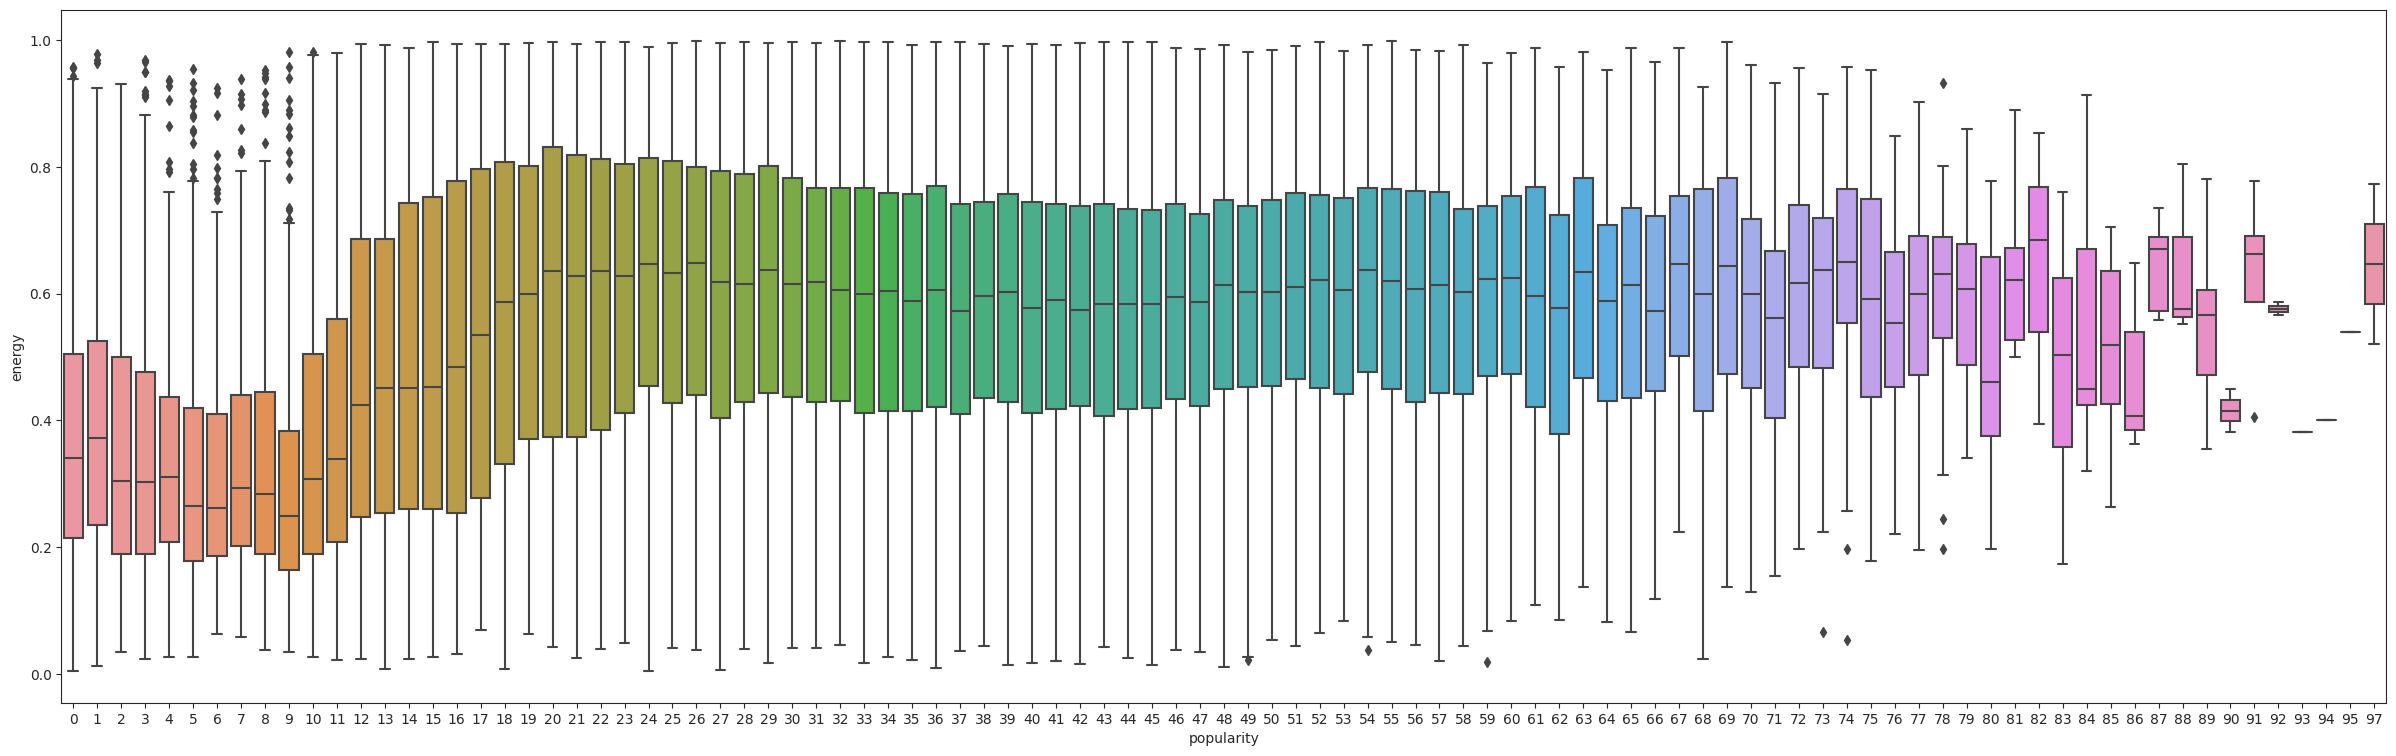

In [34]:
sns.set_style(style = 'ticks')
plt.figure(figsize = (30,9))
top = spotifyData.sort_values('popularity', ascending = False)
sns.boxplot(x = 'popularity',y = 'energy', data = top);

##12. Popularity Vs Tempo

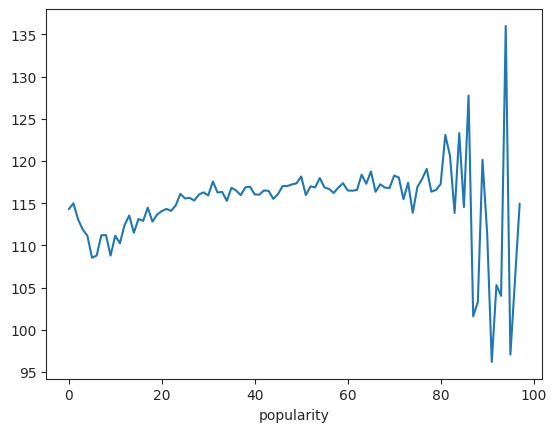

In [35]:
spotifyData.groupby('popularity')['tempo'].mean().plot();

##13. Popularity vs Instrumentalness 

<Axes: xlabel='popularity', ylabel='instrumentalness'>

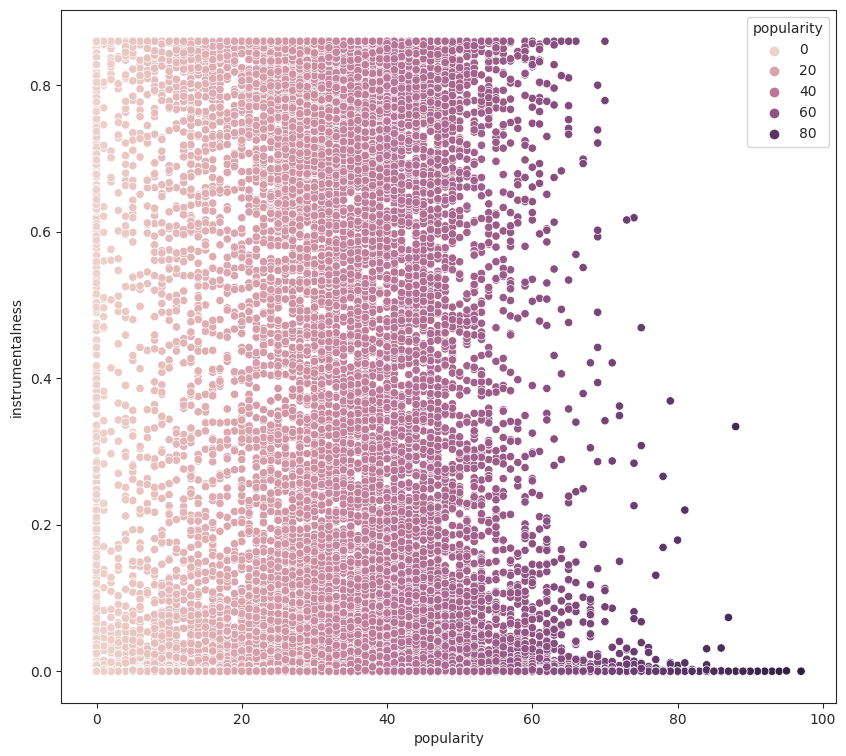

In [36]:
sns.set_style(style = 'ticks')
plt.figure(figsize = (10,9))
sns.scatterplot(x = 'popularity',y = 'instrumentalness',hue = 'popularity', data = spotifyData)

#Phase - 2


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [38]:
remove_cols=remove_col=['artist_name','track_name','track_id','popularity','mode','key','genre_list','time_signature']
feature_cols=[col for col in spotifyData.columns if not col in remove_cols]

#Best features by looking into correlation matrix
feature_cols=['acousticness','danceability','energy','loudness', 'speechiness']

In [39]:
pred_col = spotifyData[PRED_COLUMN]

## Number of songs vs their respective popularity value

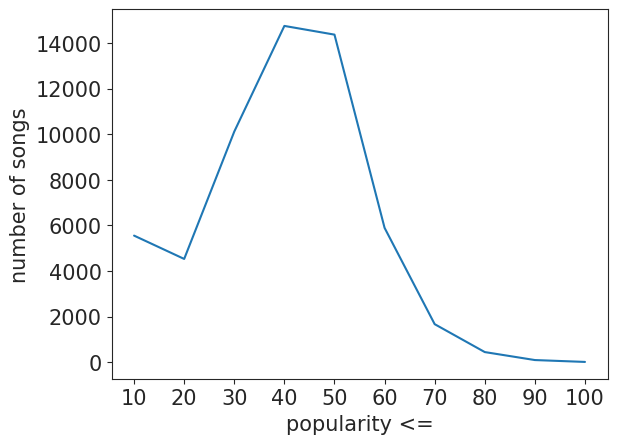

In [40]:
cnt = [0]
for i in range(1, 11):
  cnt.append(len(pred_col[pred_col <= i*10]) - sum(cnt))

plt.plot(range(10, 101, 10), cnt[1:])
plt.ylabel('number of songs',fontsize=15)
plt.xlabel('popularity <=',fontsize=15)
plt.xticks(range(10, 101, 10), fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Less than 40 popularity is concidered as class 0 and rest class 1


In [41]:
#Making continious value of popularity as discrete
spotifyData[PRED_COLUMN]=spotifyData[PRED_COLUMN].apply(lambda x: 0 if x<40 else 1)

In [42]:
X=spotifyData[feature_cols]
y=spotifyData[PRED_COLUMN]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=24)

##1. Random Forest Classifier



In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(max_depth=10, min_samples_leaf = 4, min_samples_split = 5, n_estimators =100).fit(X_train,y_train)
rf_predict=RF_model.predict(X_test)

cm=confusion_matrix(y_test,rf_predict)

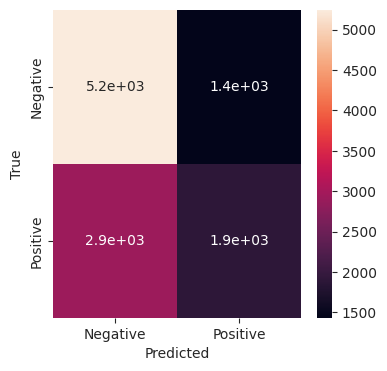

In [45]:
plt.figure(figsize = (4,4))
sns.heatmap(cm, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [46]:
tn, fp, fn, tp = cm.ravel()

# Calculate precision, recall, F1 score, and accuracy
RFC_precision = tp / (tp + fp)
RFC_recall = tp / (tp + fn)
RFC_f1_score = 2 * (RFC_precision * RFC_recall) / (RFC_precision + RFC_recall)
RFC_accuracy = (tp + tn) / (tp + fp + tn + fn)

# Print the results
print("Precision:", RFC_precision)
print("Recall:", RFC_recall)
print("F1 Score:", RFC_f1_score)
print("Accuracy:", RFC_accuracy * 100)

Precision: 0.5678119349005425
Recall: 0.39209157127991673
F1 Score: 0.4638680290533054
Accuracy: 62.080975185023945


##2. SVM

In [47]:
from sklearn.svm import SVC

svm_model_linear = SVC(kernel = 'rbf', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
  
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

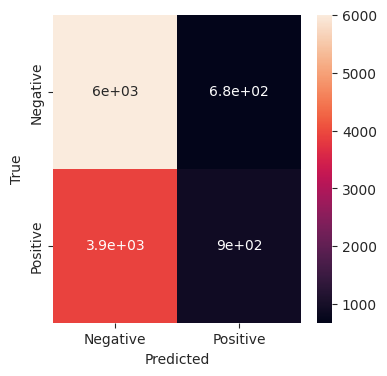

In [48]:
plt.figure(figsize = (4,4))
sns.heatmap(cm, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [49]:
tn, fp, fn, tp = cm.ravel()

# Calculate precision, recall, F1 score, and accuracy
SVM_precision = tp / (tp + fp)
SVM_recall = tp / (tp + fn)
SVM_f1_score = 2 * (SVM_precision * SVM_recall) / (SVM_precision + SVM_recall)
SVM_accuracy = (tp + tn) / (tp + fp + tn + fn)

# Print the results
print("Precision:", SVM_precision)
print("Recall:", SVM_recall)
print("F1 Score:", SVM_f1_score)
print("Accuracy:", SVM_accuracy * 100)

Precision: 0.5705249841872233
Recall: 0.18772112382934444
F1 Score: 0.28249295333542124
Accuracy: 60.10448410970831


##3. Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression()
LR_model.fit(X_train,y_train)

lr_predict=LR_model.predict(X_test)
cm=confusion_matrix(y_test,lr_predict)

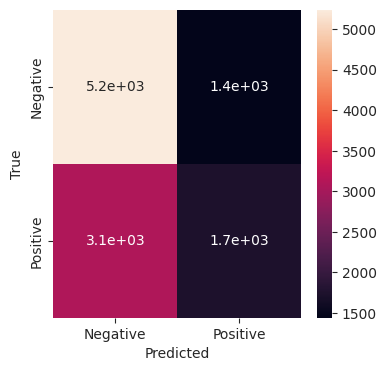

In [51]:
plt.figure(figsize = (4,4))
sns.heatmap(cm, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [52]:
tn, fp, fn, tp = cm.ravel()

# Calculate precision, recall, F1 score, and accuracy
LR_precision = tp / (tp + fp)
LR_recall = tp / (tp + fn)
LR_f1_score = 2 * (LR_precision * LR_recall) / (LR_precision + LR_recall)
LR_accuracy = (tp + tn) / (tp + fp + tn + fn)

# Print the results
print("Precision:", LR_precision)
print("Recall:", LR_recall)
print("F1 Score:", LR_f1_score)
print("Accuracy:", LR_accuracy * 100)

Precision: 0.5460277427490542
Recall: 0.3604578563995838
F1 Score: 0.434248464334963
Accuracy: 60.705267740531134


##4.K-Nearest Neighbour classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

tr_accuracy = []
te_accuracy = []
error = []
for k in range(1, 16, 2):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train,y_train)
  knn_predict=knn_model.predict(X_test)
  te_acc = accuracy_score(y_test, knn_predict) * 100
  tr_acc = accuracy_score(y_train, knn_model.predict(X_train))
  te_accuracy.append(tr_acc)
  tr_accuracy.append(tr_acc)
  error.append(100-te_acc)
cm=confusion_matrix(y_test,knn_predict)

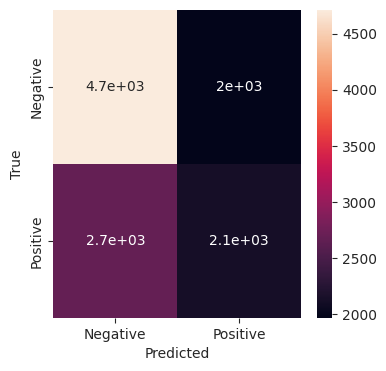

In [54]:
plt.figure(figsize = (4,4))
sns.heatmap(cm, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [55]:
tn, fp, fn, tp = cm.ravel()

# Calculate precision, recall, F1 score, and accuracy
KNN_precision = tp / (tp + fp)
KNN_recall = tp / (tp + fn)
KNN_f1_score = 2 * (KNN_precision * KNN_recall) / (KNN_precision + KNN_recall)
KNN_accuracy = (tp + tn) / (tp + fp + tn + fn)

# Print the results
print("Precision:", KNN_precision)
print("Recall:", KNN_recall)
print("F1 Score:", KNN_f1_score)
print("Accuracy:", KNN_accuracy * 100)

Precision: 0.5187178859799364
Recall: 0.441207075962539
F1 Score: 0.4768331084120558
Accuracy: 59.49499346974314


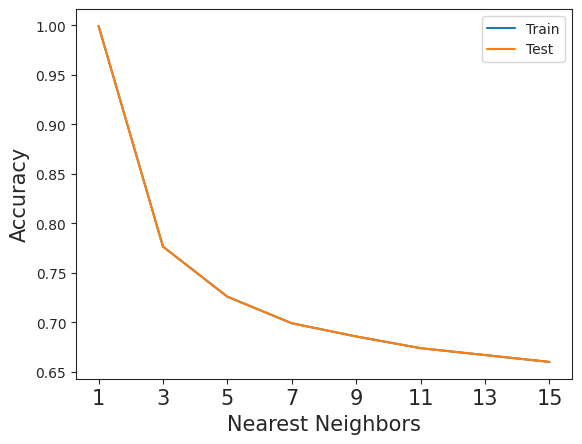

In [56]:
plt.plot(range(1, 16, 2), tr_accuracy)
plt.plot(range(1, 16, 2), te_accuracy) 
plt.ylabel('Accuracy',fontsize=15) 
plt.xlabel('Nearest Neighbors',fontsize=15)
plt.xticks(range(1, 16, 2), fontsize=15)
plt.yticks(fontsize=10)
plt.legend(['Train', 'Test']) 
plt.show()

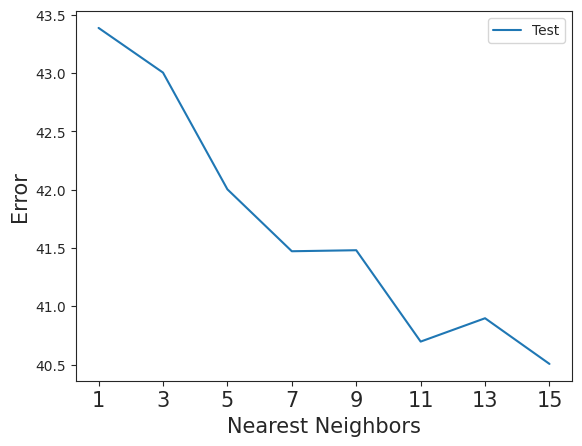

In [57]:
plt.plot(range(1, 16, 2), error)
plt.ylabel('Error',fontsize=15) 
plt.xlabel('Nearest Neighbors',fontsize=15)
plt.xticks(range(1, 16, 2), fontsize=15)
plt.yticks(fontsize=10)
plt.legend(['Test']) 
plt.show()

##5. Neural Network

In [58]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input
import numpy as np

model=Sequential()
model.add(Input(shape=(5,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss ='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,530
Trainable params: 2,530
Non-trainable params: 0
_________________________________________________________________


In [59]:
fitting = model.fit(X_train,y_train,validation_data = (X_test,y_test), batch_size=256,epochs=100)

Epoch 1/100
180/180 [==============================] - 2s 6ms/step - loss: 0.6932 - accuracy: 0.5683 - val_loss: 0.6601 - val_accuracy: 0.5815
Epoch 2/100
180/180 [==============================] - 1s 4ms/step - loss: 0.6594 - accuracy: 0.5863 - val_loss: 0.6550 - val_accuracy: 0.5947
Epoch 3/100
180/180 [==============================] - 1s 3ms/step - loss: 0.6551 - accuracy: 0.5922 - val_loss: 0.6503 - val_accuracy: 0.5969
Epoch 4/100
180/180 [==============================] - 0s 3ms/step - loss: 0.6514 - accuracy: 0.5962 - val_loss: 0.6472 - val_accuracy: 0.6024
Epoch 5/100
180/180 [==============================] - 0s 3ms/step - loss: 0.6491 - accuracy: 0.5981 - val_loss: 0.6452 - val_accuracy: 0.6054
Epoch 6/100
180/180 [==============================] - 0s 3ms/step - loss: 0.6479 - accuracy: 0.6008 - val_loss: 0.6452 - val_accuracy: 0.6056
Epoch 7/100
180/180 [==============================] - 0s 3ms/step - loss: 0.6465 - accuracy: 0.6011 - val_loss: 0.6472 - val_accuracy: 0.6010

In [60]:
nn_predict=model.predict(X_test)
nn_predict=np.argmax(nn_predict,axis=1)
cm = confusion_matrix(y_test, nn_predict)

359/359 [==============================] - 1s 2ms/step


In [61]:
tn, fp, fn, tp = cm.ravel()

# Calculate precision, recall, F1 score, and accuracy
NN_precision = tp / (tp + fp)
NN_recall = tp / (tp + fn)
NN_f1_score = 2 * (NN_precision * NN_recall) / (NN_precision + NN_recall)
NN_accuracy = (tp + tn) / (tp + fp + tn + fn)

# Print the results
print("Precision:", NN_precision)
print("Recall:", NN_recall)
print("F1 Score:", NN_f1_score)
print("Accuracy:", NN_accuracy * 100)

Precision: 0.5523439397619626
Recall: 0.4732570239334027
F1 Score: 0.5097511768661735
Accuracy: 61.91554201131911


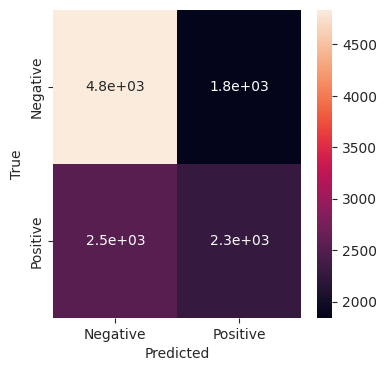

In [62]:
plt.figure(figsize = (4,4))
sns.heatmap(cm, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

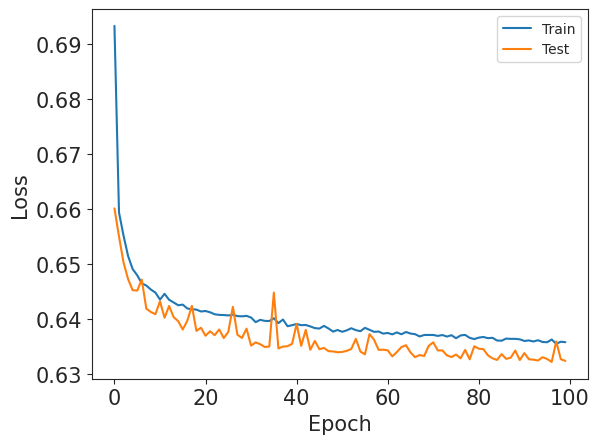

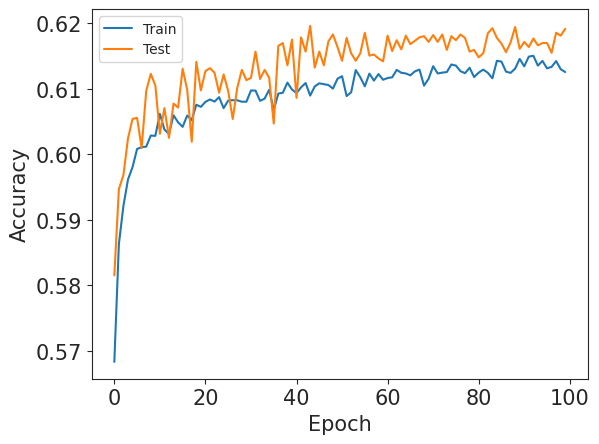

In [63]:
#Test and training loss
plt.plot(fitting.history['loss'])
plt.plot(fitting.history['val_loss']) 
plt.ylabel('Loss',fontsize=15) 
plt.xlabel('Epoch',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Train', 'Test']) 
plt.show()

#Test and training accuracy
plt.plot(fitting.history['accuracy'])
plt.plot(fitting.history['val_accuracy']) 
plt.ylabel('Accuracy',fontsize=15) 
plt.xlabel('Epoch',fontsize=15) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Train', 'Test']) 
plt.show()

##Overall Performance Comparison

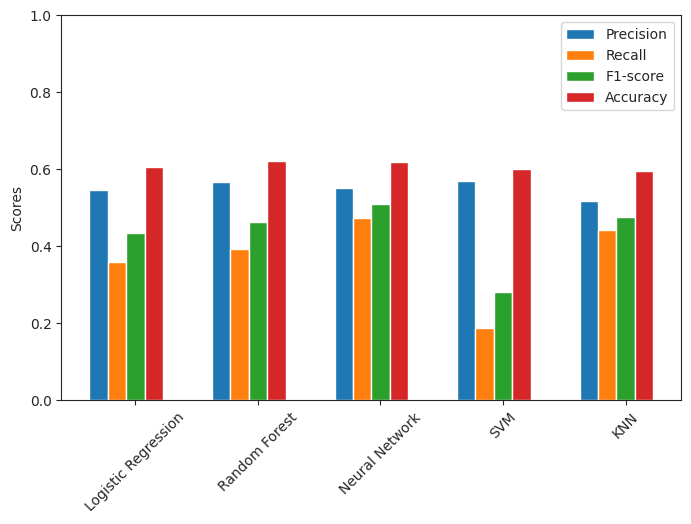

In [64]:
results = []

results.append(('Logistic Regression', LR_precision, LR_recall, LR_f1_score, LR_accuracy))
results.append(('Random Forest', RFC_precision, RFC_recall, RFC_f1_score, RFC_accuracy))
results.append(('Neural Network', NN_precision, NN_recall, NN_f1_score, NN_accuracy))
results.append(('SVM', SVM_precision, SVM_recall, SVM_f1_score, SVM_accuracy))
results.append(('KNN', KNN_precision, KNN_recall, KNN_f1_score, KNN_accuracy))

# Plot the results
names = [result[0] for result in results]
precision = [result[1] for result in results]
recall = [result[2] for result in results]
f1 = [result[3] for result in results]
accuracy = [result[4] for result in results]

fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(names))
ax.bar(x-0.3, precision, width=0.15, label='Precision')
ax.bar(x-0.15, recall, width=0.15, label='Recall')
ax.bar(x, f1, width=0.15, label='F1-score')
ax.bar(x+0.15, accuracy, width=0.15, label='Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
ax.set_ylabel('Scores')
ax.set_ylim([0, 1])
ax.legend()
plt.show()

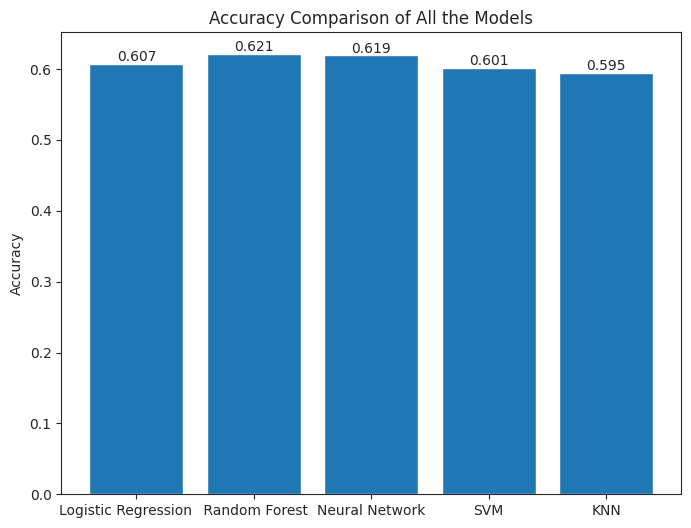

In [65]:
results = {}

results['Logistic Regression     '] = LR_accuracy
results[' Random Forest'] = RFC_accuracy
results['Neural Network'] = NN_accuracy
results['SVM'] = SVM_accuracy
results['KNN'] = KNN_accuracy


# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(results.keys(), results.values(), align='center')
ax.set_title('Accuracy Comparison of All the Models')
ax.set_ylabel('Accuracy')
for i, v in enumerate(results.values()):
    ax.text(i, v, str(round(v, 3)), ha='center', va='bottom')
plt.show()